# Data Analysis on Super Market

In [2]:
import pandas as pd
import matplotlib.pyplot as m
import seaborn as sb

In [3]:
dataset = pd.read_csv("Stores.csv")

In [4]:
dataset.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


### No. of Rows & Columns

In [5]:
dataset.shape
print("Numbers of Rows: ",dataset.shape[0])
print("Numbers of Columns: ",dataset.shape[1])

Numbers of Rows:  896
Numbers of Columns:  5


### Check Missing Values

In [6]:
dataset.isnull().sum() # there is no missing value

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

### Data types of Attributes

In [7]:
dataset.dtypes # All attributes are int

Store ID                int64
Store_Area              int64
Items_Available         int64
Daily_Customer_Count    int64
Store_Sales             int64
dtype: object

### Change the name of an Attribute

In [8]:
dataset.rename(columns = {"Store ID ": "store_id"}, inplace = True )

In [9]:
dataset.columns

Index(['store_id', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

### Count of Unique values of all Attributes

In [10]:
dataset.nunique()

store_id                896
Store_Area              583
Items_Available         616
Daily_Customer_Count    130
Store_Sales             816
dtype: int64

In [11]:
d1 = dataset.groupby('Store_Area')['Items_Available'].max().reset_index()
d1

,Store_Area,Items_Available
0,775,932
1,780,951
2,854,1018
3,869,1050
4,891,1073
...,...,...
578,2063,2493
579,2067,2492
580,2169,2617
581,2214,2647


<AxesSubplot:xlabel='Store_Area', ylabel='Items_Available'>

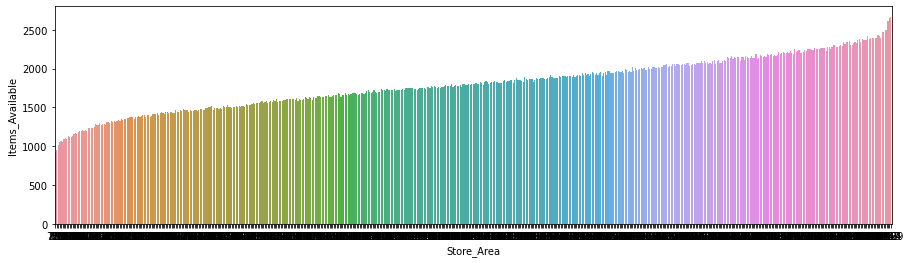

In [12]:
m.figure(figsize=(15,4))
sb.barplot(x='Store_Area',y='Items_Available',data=d1) 

So by this barplot , one can make out that if the area is large more no. of items are also more

### Among all the store which store cover more area & how much does it cover

In [13]:
dataset[['store_id','Store_Area']][dataset['Store_Area'] == dataset['Store_Area'].max()]

,store_id,Store_Area
466,467,2229


Store id no. 467 cover the largest area among all stores

In [14]:
d2 = dataset.groupby('Items_Available')['Daily_Customer_Count'].max().reset_index()
d2

,Items_Available,Daily_Customer_Count
0,932,1090
1,951,790
2,1018,660
3,1050,850
4,1059,870
...,...,...
611,2492,790
612,2493,810
613,2617,600
614,2647,740


<AxesSubplot:xlabel='Items_Available', ylabel='Daily_Customer_Count'>

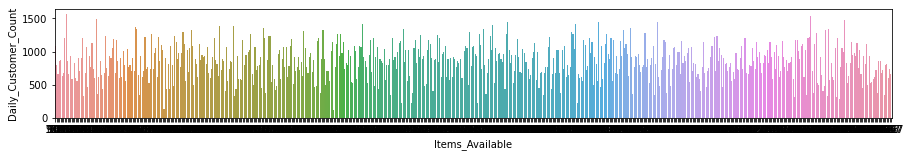

In [15]:
m.figure(figsize=(15,2))
sb.barplot(x='Items_Available',y='Daily_Customer_Count',data=d2)

There is no correlation between Available items in a store and the count of a Customers

### Which Store has more no. of Daily Customers & what's area of that Store

In [16]:
d3 = dataset[['Daily_Customer_Count','Store_Area','Items_Available']][dataset['Daily_Customer_Count'] == dataset['Daily_Customer_Count'].max()]
d3

,Daily_Customer_Count,Store_Area,Items_Available
848,1560,919,1099


### connection between "Daily_Customer_Count" & "Store_Sales" Attributes

In [17]:
dataset.columns

Index(['store_id', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [28]:
d4 = dataset.groupby('Daily_Customer_Count')['Store_Sales'].max().reset_index()
d4

,Daily_Customer_Count,Store_Sales
0,10,45480
1,70,63730
2,100,88270
3,120,72350
4,130,58920
...,...,...
125,1450,43640
126,1470,77120
127,1490,35420
128,1530,40350


<AxesSubplot:xlabel='Daily_Customer_Count', ylabel='Store_Sales'>

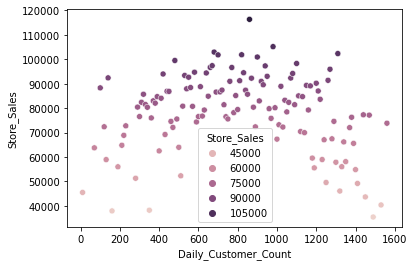

In [29]:
sb.scatterplot(x='Daily_Customer_Count',y='Store_Sales',hue='Store_Sales',data=d4)

This plotting of graph implies that it's not like that if there are more no. daily customers the sales will be more

Now, let's make an analysis  between Store Area & Sales

In [31]:
d5 = dataset.groupby('Store_Area')['Store_Sales'].max().reset_index()
d5

,Store_Area,Store_Sales
0,775,42530
1,780,25600
2,854,77740
3,869,52540
4,891,67370
...,...,...
578,2063,51480
579,2067,70230
580,2169,67080
581,2214,65900


<AxesSubplot:xlabel='Store_Area', ylabel='Store_Sales'>

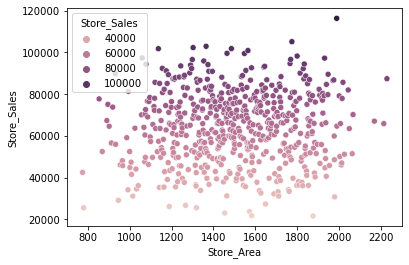

In [33]:
sb.scatterplot(x='Store_Area',y='Store_Sales',hue='Store_Sales',data=d5)

<AxesSubplot:xlabel='Store_Area', ylabel='Store_Sales'>

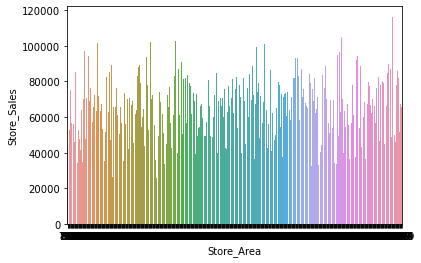

In [34]:
sb.barplot(x='Store_Area',y='Store_Sales',data=d5)

There is no correlation between Store_Area and Store_Sales as such

It keeps on vary

In [ ]:
Analysis would have been much better than this if this dataset would have content more inform

So, These was all about data Analysis on the supermarket